In [1]:
#한글 서체 설치 # 생략 가능
#실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요. 

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,661 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160975 files and d

In [ ]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다.
#이 과정이 싫다면 5.2 합성곱 신경맛 맛보기로 건너 뛰어도 상관없습니다.

In [1]:
#한글깨짐 해결 
#이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
#import matplotlib.pyplot as plt

#plt.rc('font', family='NanumBarunGothic')

In [2]:
#5.2 합성곱 신경망 맛보기

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


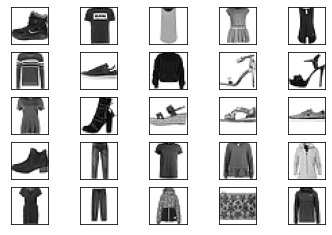

In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
               
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6956 - accuracy: 0.7508
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4091 - accuracy: 0.8534
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3680 - accuracy: 0.8637
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3442 - accuracy: 0.8744
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3303 - accuracy: 0.8774
313/313 - 0s - loss: 0.3550 - accuracy: 0.8693


[0.35496675968170166, 0.8693000078201294]

In [7]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [8]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
 
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 1.1737 - accuracy: 0.5681
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5390 - accuracy: 0.7966
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4656 - accuracy: 0.8328
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4211 - accuracy: 0.8484
Epoch 5/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3793 - accuracy: 0.8620
313/313 - 3s - loss: 0.3899 - accuracy: 0.8589


[0.38992685079574585, 0.8589000105857849]

In [10]:
# <노트>
# pip install scikit_image: 노트의 내용을 실습하기 위해서는 scikit_image 라이브러리를 설치해야합니다
!pip install scikit_image

In [11]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [12]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

Saving bird.jpg to bird.jpg


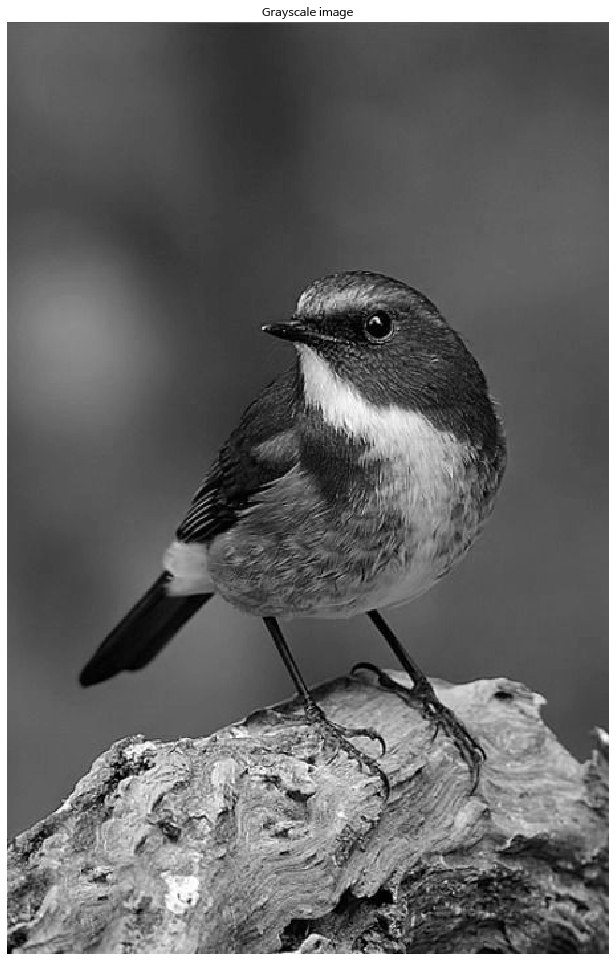

In [13]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기

image_gs = imread('bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [14]:
print_image_summary(image_gs, ['G'])
# </노트>

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [15]:
#5.3 전이학습
# 5.3.1 특성추출(Feature Extractor) 기법

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102973440/102967424 [==============================] - 1s 0us/step


In [18]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [19]:
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   

#시간이 오래 걸리면 구글 드라이브에서 불러오기로 변경해서 진행해주세요.
#from google.colab import drive 
#drive.mount('/content/drive/') 

#chap5 > data 폴더에 있는 catanddog.zip 파일을 선택합니다.
train_dir = "catanddog.zip"
!unzip catanddog.zip               #압축 풀기

Saving catanddog.zip to catanddog.zip
Archive:  catanddog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/10.jpg        
  inflating: train/Cat/11.jpg        
  inflating: train/Cat/12.jpg        
  inflating: train/Cat/13.jpg        
  inflating: train/Cat/14.jpg        
  inflating: train/Cat/15.jpg        
  inflating: train/Cat/16.jpg        
  inflating: train/Cat/17.jpg        
  inflating: train/Cat/18.jpg        
  inflating: train/Cat/19.jpg        
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/20.jpg        
  inflating: train/Cat/21.jpg        
  inflating: train/Cat/22.jpg        
  inflating: train/Cat/23.jpg        
  inflating: train/Cat/24.jpg        
  inflating: train/Cat/25.jpg        
  inflating: train/Cat/26.jpg        
  inflating: train/Cat/27.jpg        
  inflating: train/Cat/28.jpg        
  inflating: train/Cat/29.jpg        
  inflating: train/C

In [22]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "train/"
valid_dir = "validation/"


train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(224,224), #colab에서 inputshape 오류 발생으로, tage_size shape 변경
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 38s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
13/13 - 34s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
13/13 - 32s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
13/13 - 32s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
13/13 - 32s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 32s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 32s - loss: 0.6925 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 32s - loss: 0.6924 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 32s - loss: 0.6924 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/10
13/13 - 32s - lo

Text(0.5, 1.0, '오차')

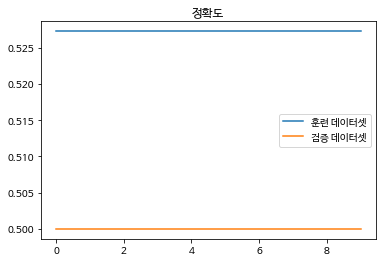

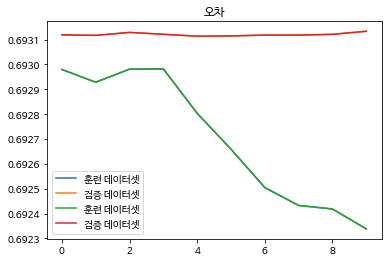

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


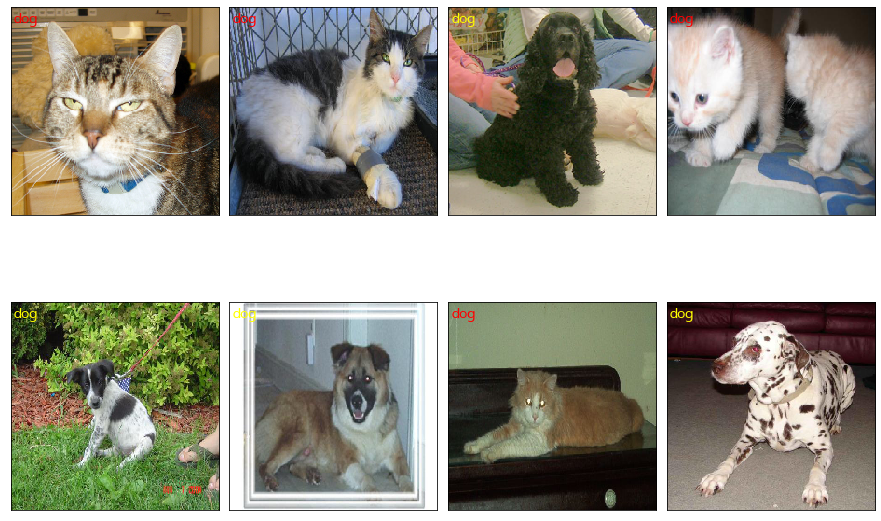

In [24]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [25]:
# 텐서플로 허브를 이용한 코드

In [26]:
#pip install tensorflow_hub
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [27]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [28]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/10
13/13 - 62s - loss: 0.8203 - accuracy: 0.7117 - val_loss: 0.4599 - val_accuracy: 0.8469
Epoch 2/10
13/13 - 49s - loss: 0.3530 - accuracy: 0.8805 - val_loss: 0.2564 - val_accuracy: 0.9286
Epoch 3/10
13/13 - 49s - loss: 0.2792 - accuracy: 0.8987 - val_loss: 0.1925 - val_accuracy: 0.9388
Epoch 4/10
13/13 - 49s - loss: 0.2892 - accuracy: 0.8805 - val_loss: 0.2496 - val_accuracy: 0.9286
Epoch 5/10
13/13 - 49s - loss: 0.2181 - accuracy: 0.9221 - val_loss: 0.2889 - val_accuracy: 0.9184
Epoch 6/10
13/13 - 49s - loss: 0.2032 - accuracy: 0.9299 - val_loss: 0.2260 - val_accuracy: 0.9286
Epoch 7/10
13/13 - 48s - loss: 0.1521 - accuracy: 0.9481 - val_loss: 0.2562 - val_accuracy: 0.9286
Epoch 8/10
13/13 - 49s - loss: 0.1394 - accuracy: 0.9558 - val_loss: 0.1962 - val_accuracy: 0.9286
Epoch 9/10
13/13 - 49s - loss: 0.1657 - accuracy: 0.9377 - val_loss: 0.2525 - val_accuracy: 0.9082
Epoch 10/10
13/13 - 49s - loss: 0.1192 - accuracy: 0.9584 - val_loss: 0.2662 - val_accuracy: 0.8980


Text(0.5, 1.0, '오차')

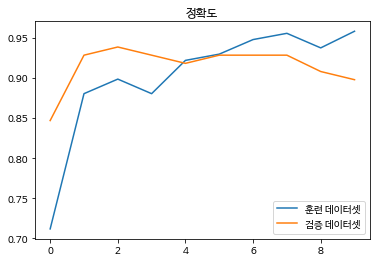

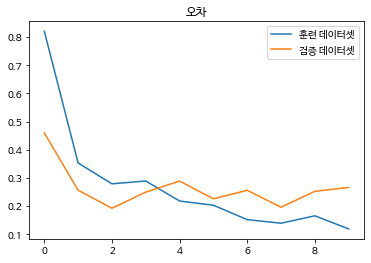

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


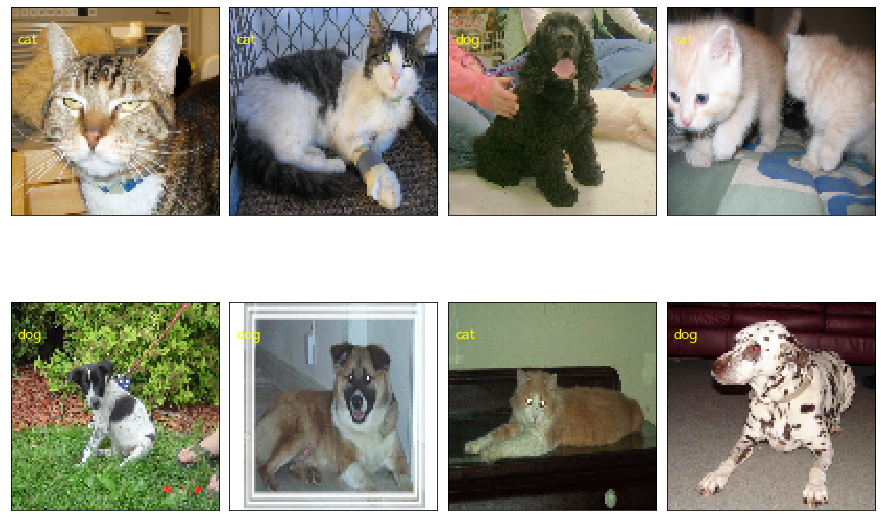

In [30]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [31]:
# 5.4 설명가능한 CNN(eXplainable CNN)
# 5.4.1 특성 맵 시각화

In [32]:
#pip install keras
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [33]:
model= keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
    
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 64)         

In [34]:
ins= model.inputs 
outs= model.layers[0].output  
feature_map= Model(inputs= ins, outputs= outs)  
feature_map.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


Saving cat.jpg to cat.jpg


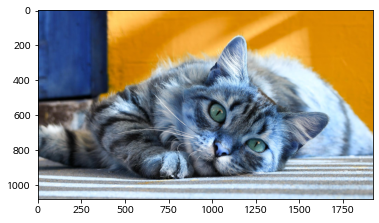

In [35]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

img=cv2.imread("cat.jpg")   
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


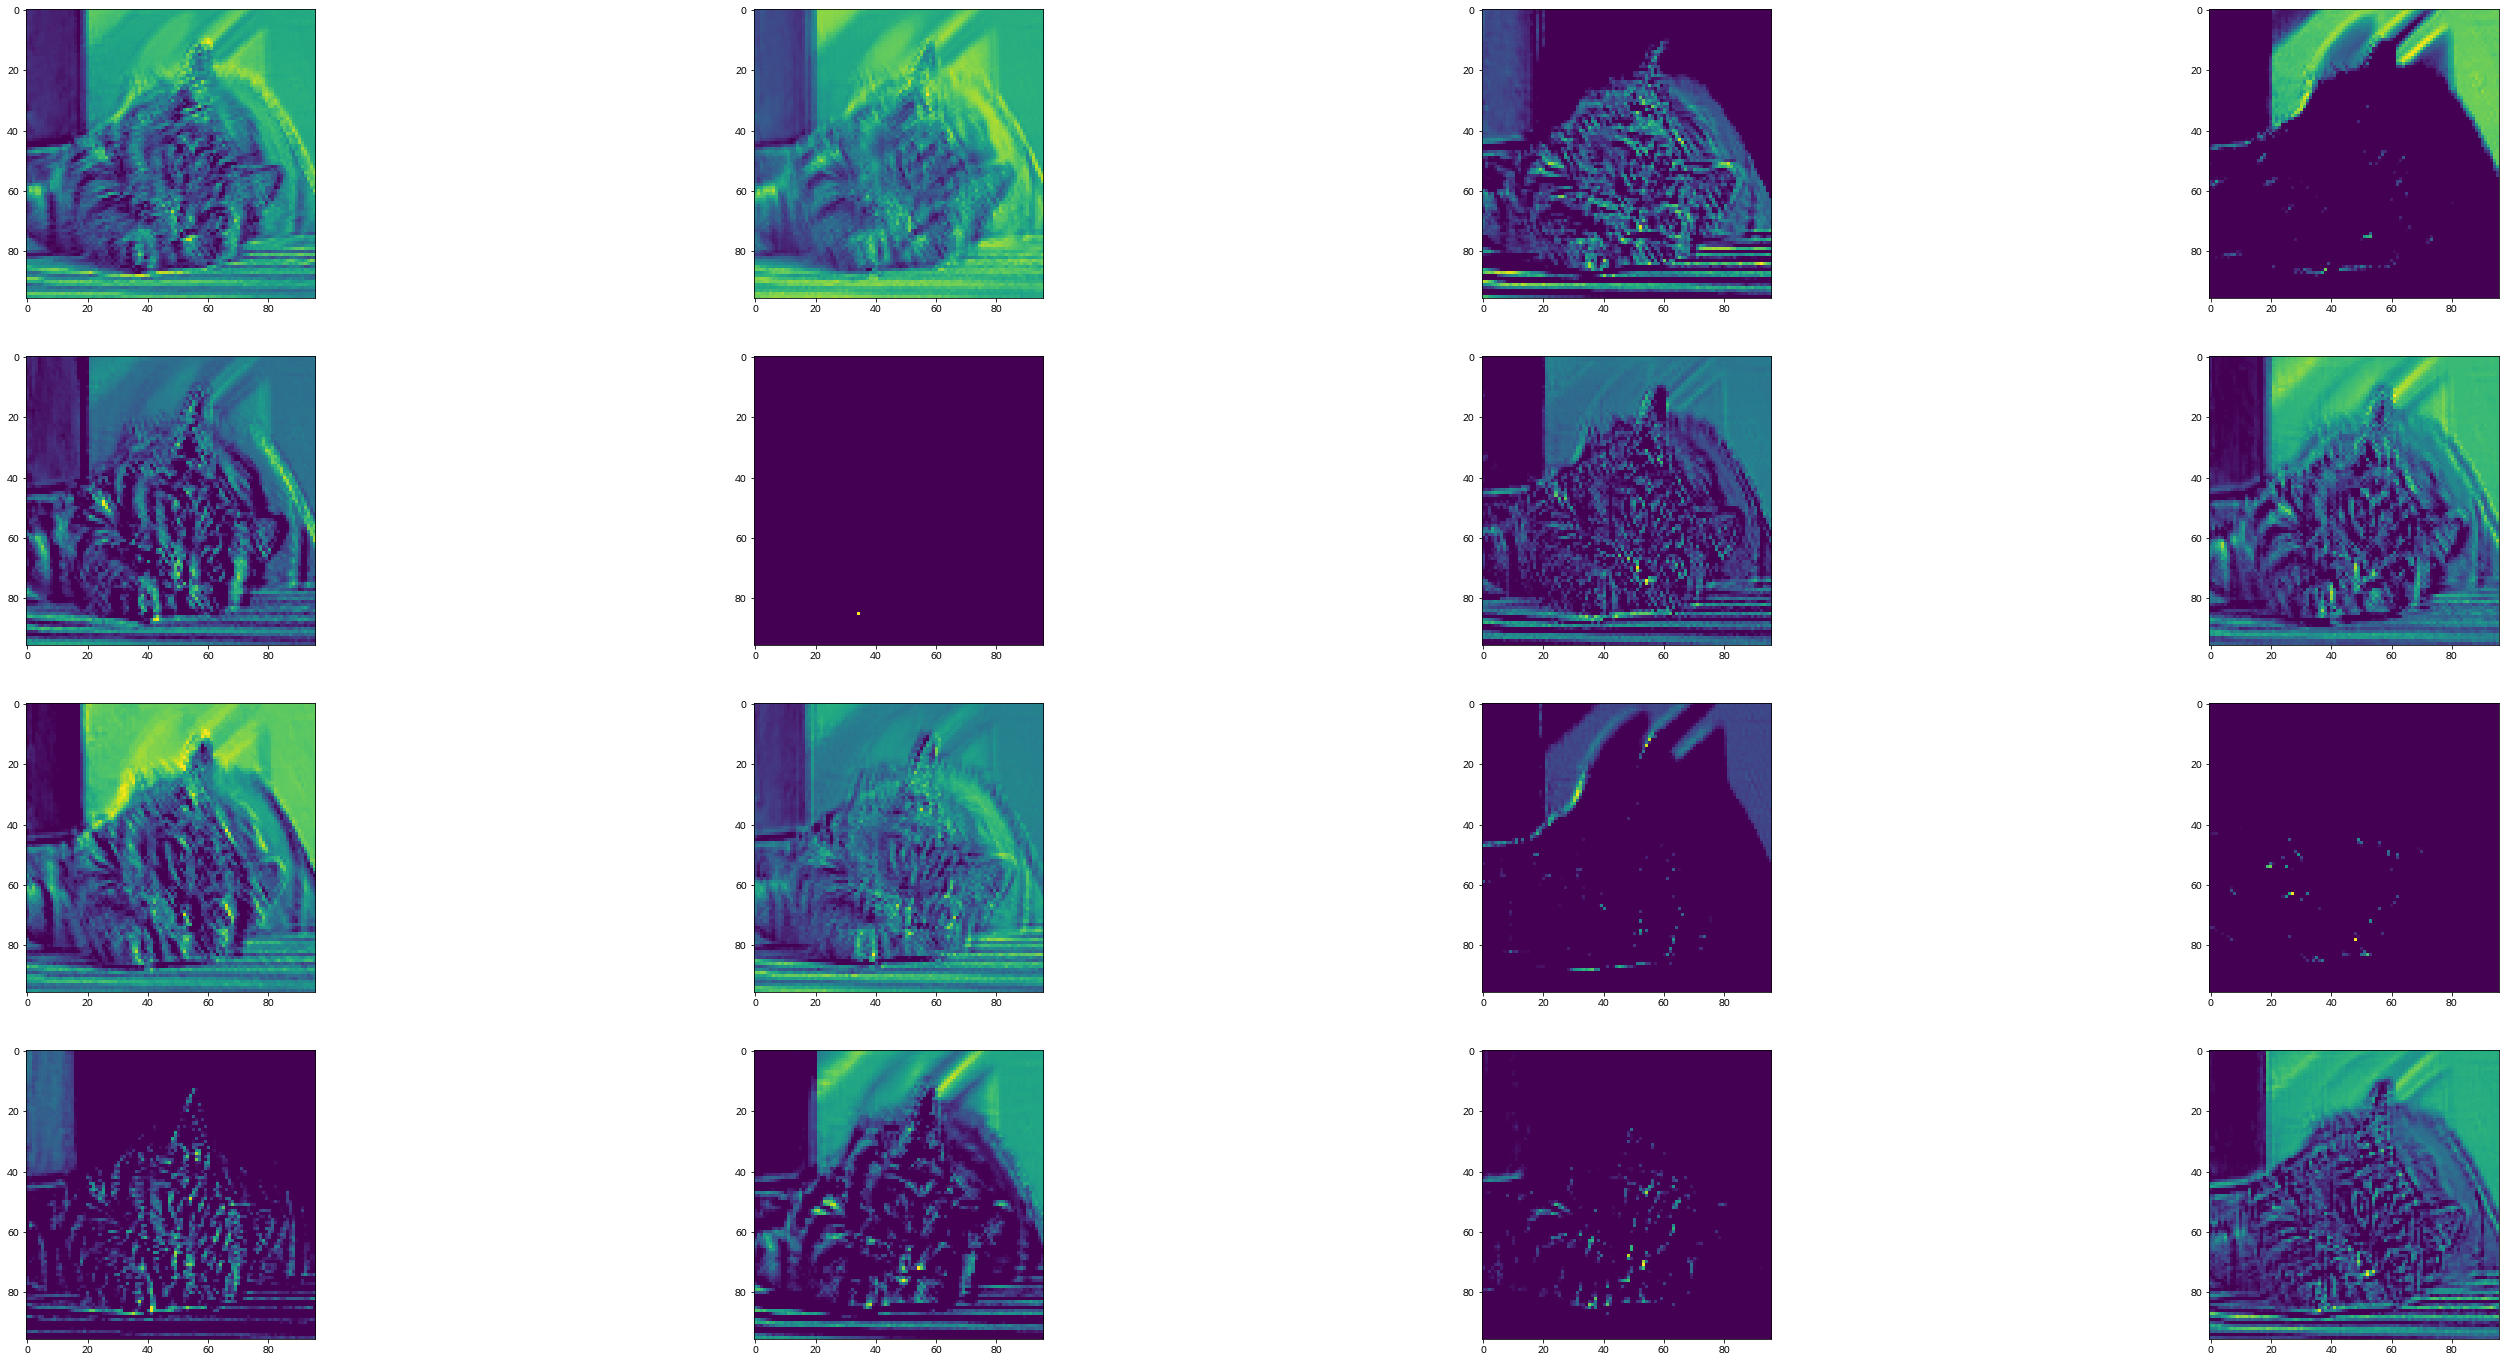

In [36]:
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
print(input_img.shape)                      
feature=feature_map.predict(input_img)       
print(feature.shape)                            
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(feature[0,:,:,i])    

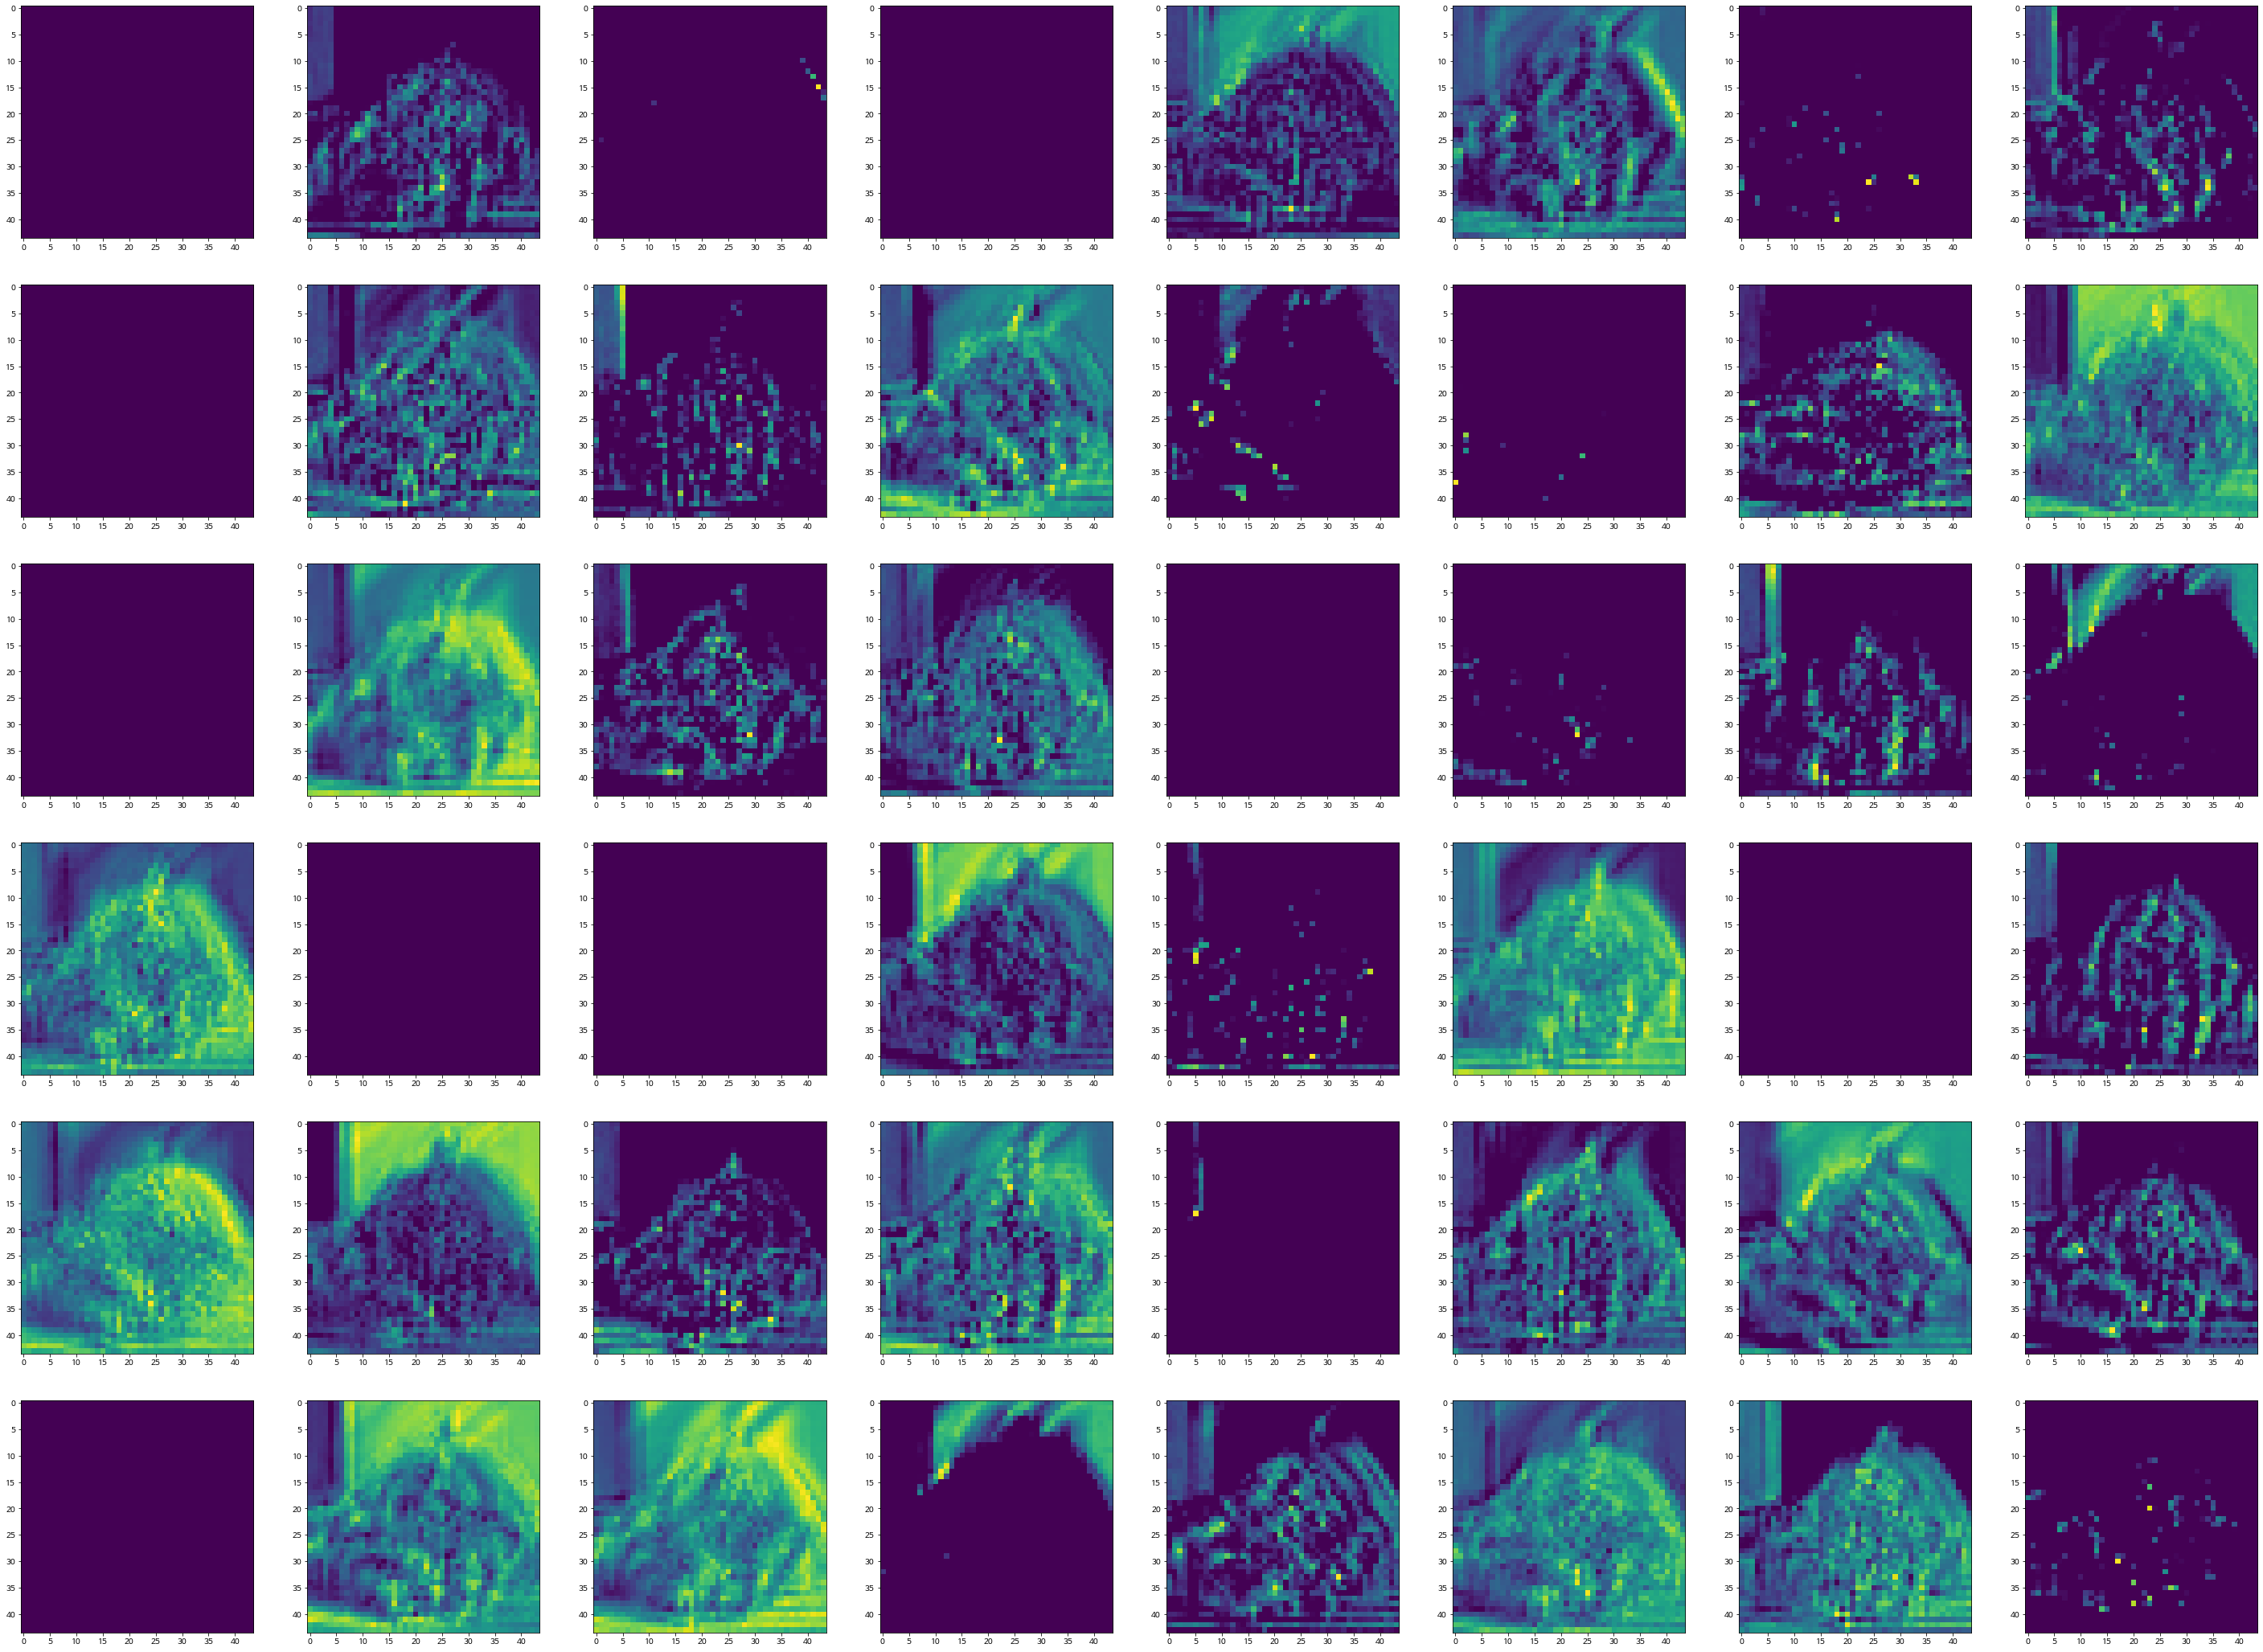

In [37]:
ins= model.inputs 
outs= model.layers[2].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread("cat.jpg")                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)   

feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])

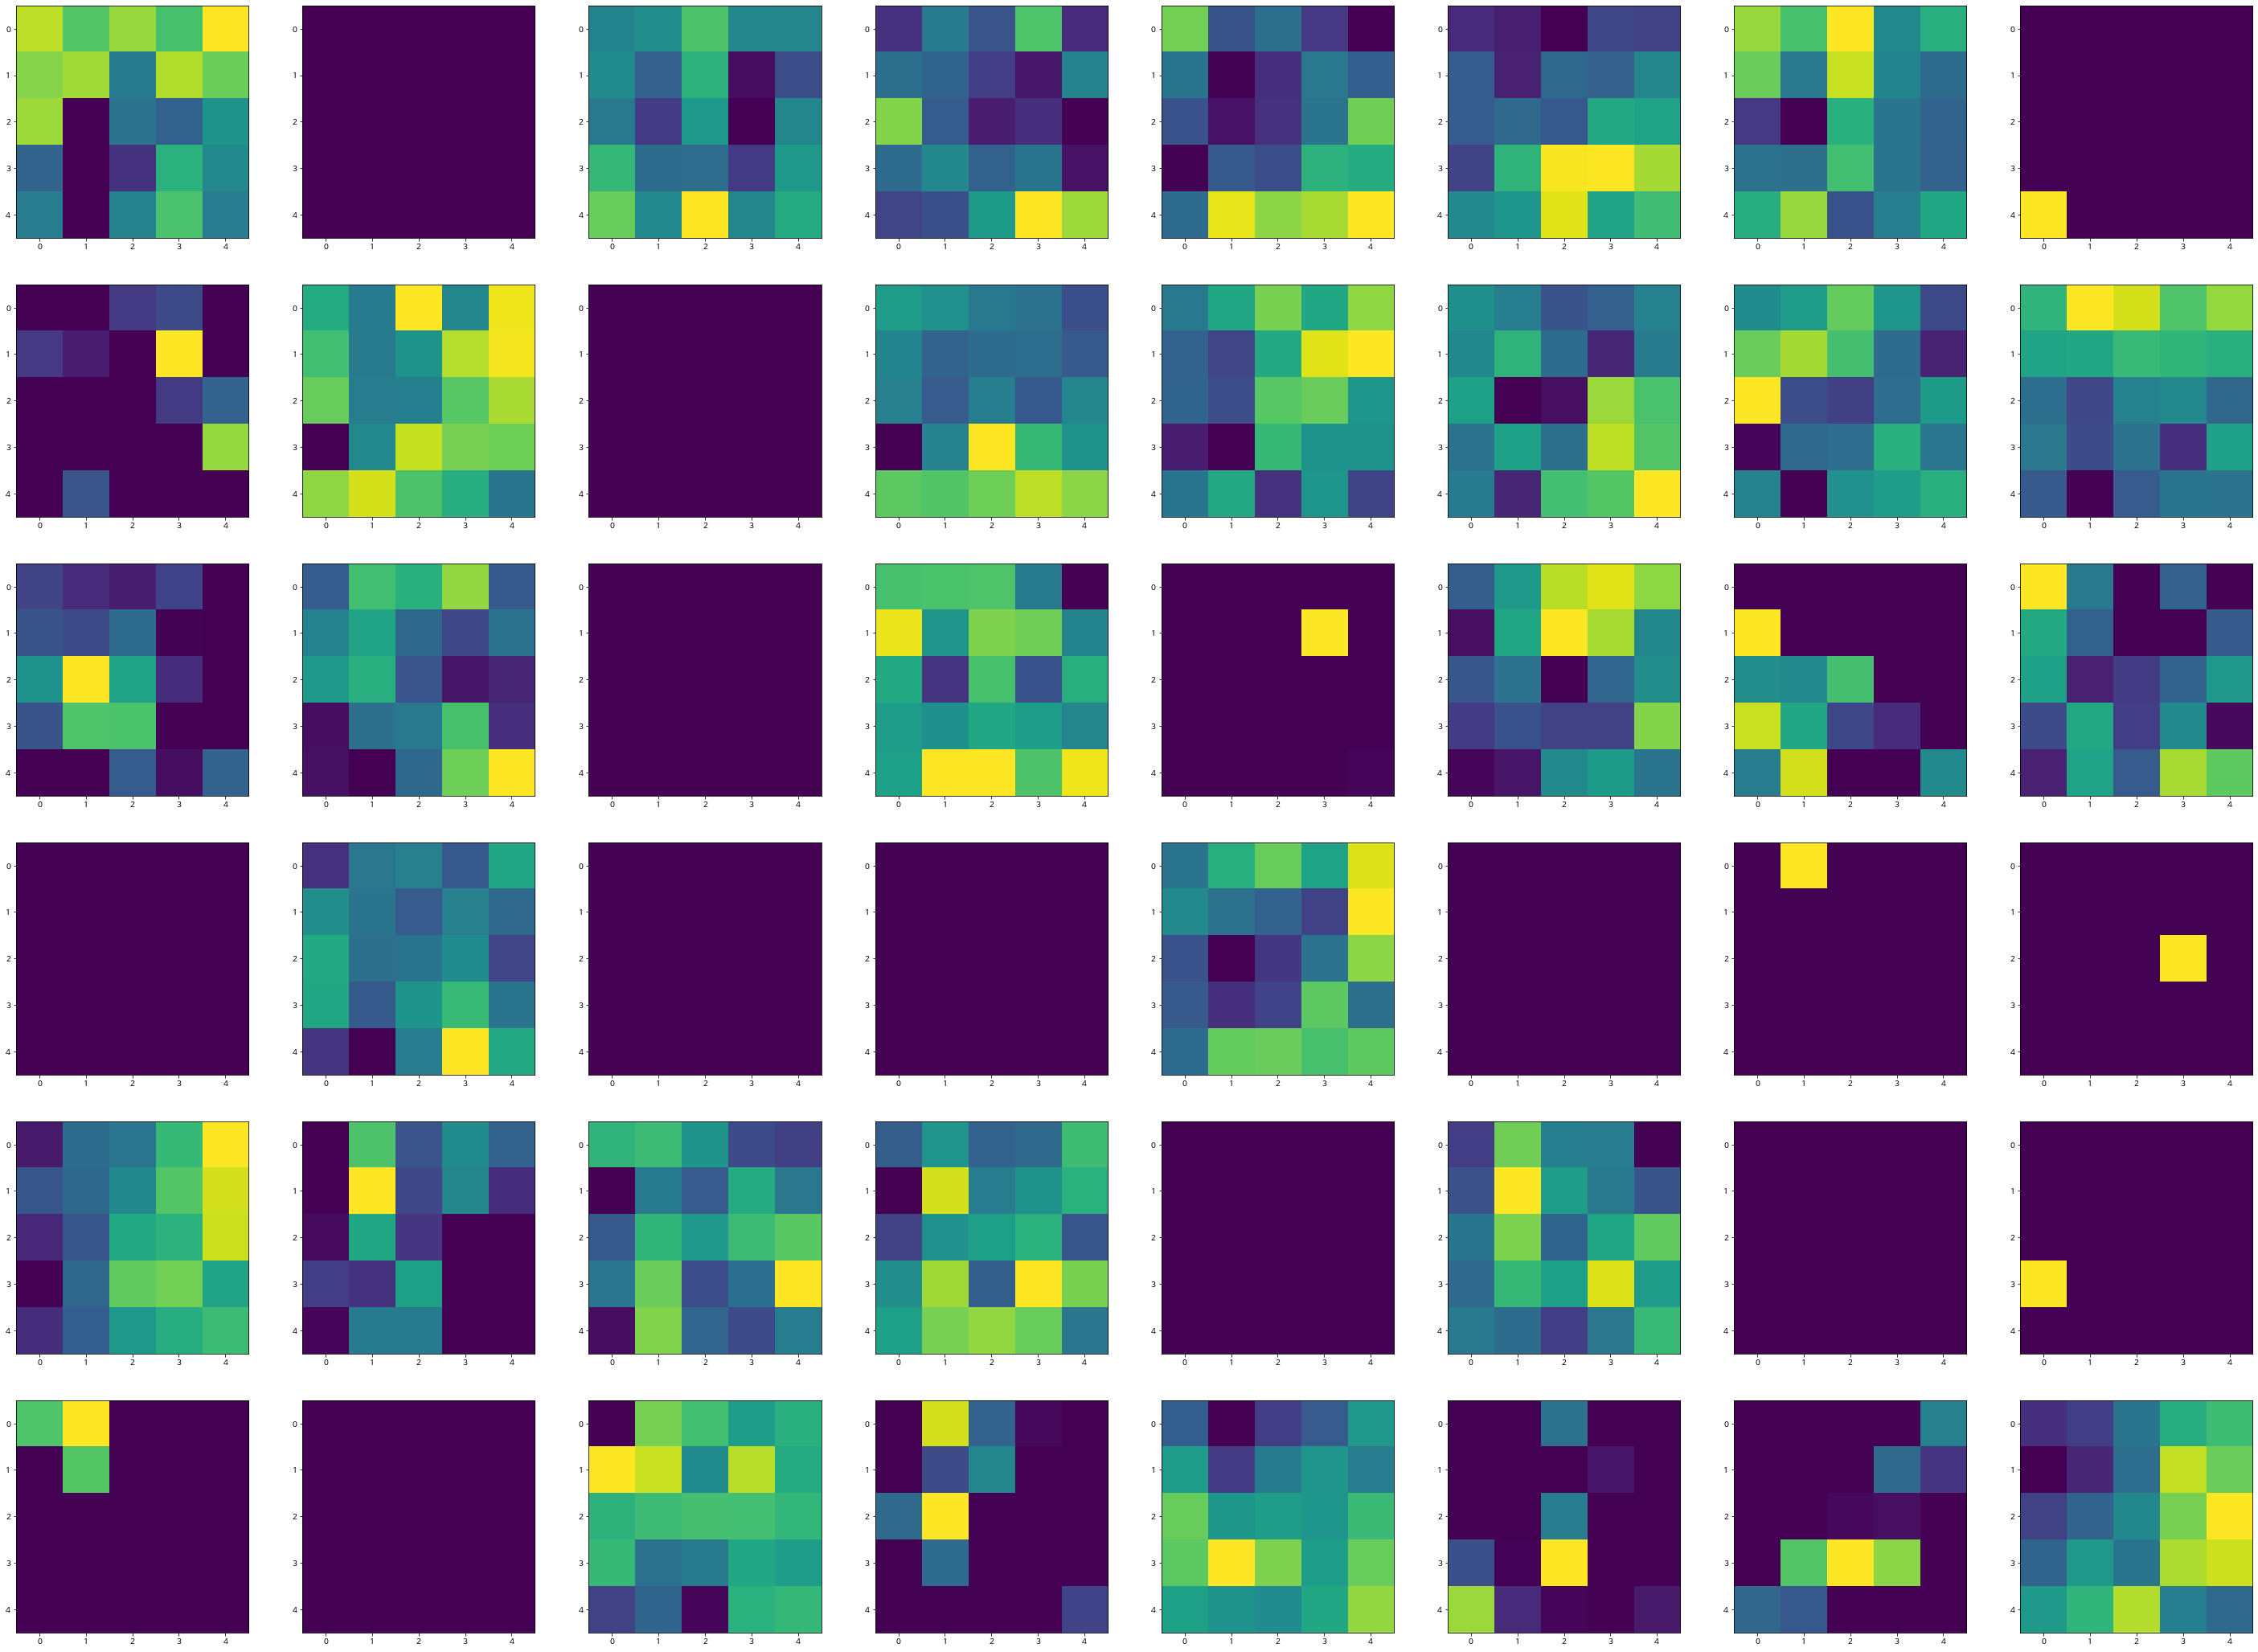

In [38]:
ins= model.inputs 
outs= model.layers[6].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread("cat.jpg")                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
                      
feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])